<a href="https://colab.research.google.com/github/martinlee192/AI-basic/blob/master/sofmax_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("학습 기기 : ", device)

True
학습 기기 :  cuda


In [4]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda' :
    torch.cuda.manual_seed_all(777)

In [5]:
#hyperparameters
training_epochs = 15
batch_size = 100

In [6]:
#torchvision.datasets.dsets.MNIST 데이터 셋 사용
#MNIST dataset
# train == True 는 훈련데이터, False면 테스트 데이터
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
#dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)
#배치 사이즈는 위에 100으로 정의
#drop_last = True인 경우  마지막 배치의 크기가 작을 때 버릴지 결정한다.
#마지막 배치 사이즈가 작을 때 상대적으로 과대평가되는 걸 막기 위해 사용

In [8]:
#이미지 크기 28*28(input), 0~9 숫자(class,output)
import torch.nn as nn
linear = nn.Linear(784, 10, bias=True).to(device)
# to() 는 연산 어디서 수행할지 정한다 ex) .to('cuda') 

In [9]:
#비용함수, 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) 
# 전에는 torch.nn.functional.cross_entropy() 사용했지만
# 이번엔 nn.CrossEntropyLoss() 사용 
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [10]:
from torch.optim.optimizer import Optimizer
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader :
        # 배치 크기 100 이므로 X는 (100,784)의 텐서가 된다.
        # to 메소드를 이용해 계산할 디바이스로 전송
        X = X.view(-1,28*28).to(device)
        # 레이블은 원 핫 인코딩이 되지 않은 0~9의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        #criterion = nn.CrossEntropyLoss().to(device)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch : ', '%04d' % (epoch + 1), 
          'cost = ','{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch :  0001 cost =  0.535150647
Epoch :  0002 cost =  0.359577745
Epoch :  0003 cost =  0.331264257
Epoch :  0004 cost =  0.316404670
Epoch :  0005 cost =  0.307106972
Epoch :  0006 cost =  0.300456583
Epoch :  0007 cost =  0.294933438
Epoch :  0008 cost =  0.290956229
Epoch :  0009 cost =  0.287074089
Epoch :  0010 cost =  0.284515619
Epoch :  0011 cost =  0.281914085
Epoch :  0012 cost =  0.279526889
Epoch :  0013 cost =  0.277636617
Epoch :  0014 cost =  0.275874794
Epoch :  0015 cost =  0.274422735
Learning Finished


In [16]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad() : 
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    print(X_test.size(), Y_test.size(), prediction.size(),torch.argmax(prediction,1).size())
    #prediction size는 [10000, 10]이다. Y_test는 one-hot-encoding이 되어 있지 않으니 
    #prediction의 argmax를 계산하여 Y_test와 비교한다. 
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()

    # [10000] T or F 데이터 mean
    print('Accuracy : ', accuracy.item())



torch.Size([10000, 784]) torch.Size([10000]) torch.Size([10000, 10]) torch.Size([10000])
Accuracy :  0.8883000016212463


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label :  9
Prediction :  9


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


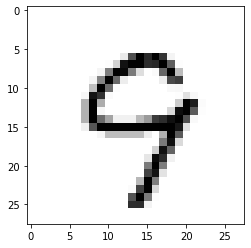

In [33]:
#MNIST 테스트 데이터에서 무작위로 하나 뽑아 예측하기
r = random.randint(0, len(mnist_test)-1 )
X_single_data = mnist_test.test_data[ r ].view(-1,28*28).float().to(device)
Y_single_data = mnist_test.test_labels[ r ].to(device)

print('Label : ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction : ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r].view(28,28), cmap='Greys',
           interpolation='nearest')
plt.show()